# Week1授業前課題1 Pythonを使ってみよう

## 1.このテキストについて
テキストの目的
基礎的なプログラミング力を確認する
プログラミングを何らかしらの問題に対して適用してみる
随時調査しながら進められるようにする

どのように学ぶか
DIVERのPython入門テキストで得たことを生かし、問題を解いていってください。新しいことも登場するので、調査しながら進めていくことになります。

## 2.紙を折る
紙を折り続けると厚さが増していき、43回で月に届くという話があります。しかし、実際には10回も折ることができません。また、手計算も大変です。

そこで今回の課題では **1枚の紙を43回折り曲げた時の厚さを計算するプログラム** を作成します。

43回折った紙の厚さ 
$t_{43}$ は、折る前の紙の厚さ $t_{0}$ を使い以下の数式で求まります。

$
t_{43} = t_{0}×2^{43}
$

折る前の紙の厚さ $t_{0}$ は**0.00008m**とします。一般的なコピー用紙の厚さです。

## 3.2つの方法による厚さの計算
プログラミングでは同じ動作を様々な方法で記述することができます。今回は以下の2つを作成してください。

・べき乗の算術演算子を使用
・for文を使用


## 【問題1】べき乗の算術演算子を使用して作成
べき乗の算術演算子を使用したプログラムを作ってください。
雛形として紙を1回折った時の厚さを計算するコードを用意しました。これを43回折った時のコードに書き換えてください。


In [6]:
"""
紙を43回折った時の厚さを計算するコード
"""
THICKNESS = 0.00008
FOLD_TIMES = 43
folded_thickness = THICKNESS*2**FOLD_TIMES
print("厚さ： {}メートル".format(folded_thickness))

厚さ： 703687441.77664メートル


## 【問題2】単位の変換
単位がメートルだと実感が湧きづらいので、**◯◯万キロメートル** に変換して表示させてください。


サンプルとして **◯◯キロメートル** に変換したコードを用意したので、参考にして取り組んでください。小数点以下は2桁まで表示されるようにも指定しています。

「月までの距離」を検索して、折った紙が月に届くかどうか確認してみましょう。

In [4]:
# メートルをキロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}万キロメートル".format(folded_thickness/(1000 * 10000)))

厚さ： 70.37万キロメートル


地球から月までの距離は38万キロメートルなので、43回折ると(折れれば)月に到達する。

## 【問題3】for文を使用して作成
次に、for文を使用したプログラムを作ってください。


べき乗の算術演算子は使ってはいけません。算術演算子は四則演算（+、-、*、/）のみ使えます。


《ヒント》


べき乗は以下のように掛け算の繰り返しに置き換えることができます。  
$
2^3=2×2×2\ 
$
  
$
2^5=2×2×2×2×2
$

In [7]:
folded_thickness = THICKNESS
for i in range(FOLD_TIMES):
    folded_thickness *= 2
    
# メートルをキロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}万キロメートル".format(folded_thickness/(1000 * 10000)))

厚さ： 70.37万キロメートル


## 【問題4】計算時間の比較
2つの方法はどちらが正しいわけでもありませんが、コードの良さを評価する際には以下のような着目点があります。

計算速度
メモリの使用量
可読性
拡張性
再利用性

今回は計算速度を比較してみます。以下の雛形を使用して、2つの方法の計算時間を出力してください。そして、それぞれの計算時間の関係を簡単に説明してください。どちらの書き方が良さそうでしょうか。なお、変数の定義やprint文など、どちらの方法でも使われている部分は除いた範囲の時間を比較してください  

timeモジュールを用いることで現在の時間を取得できます。比較したい箇所の前後の時間の差を計算することで、実行時間を求めます。


《発展：繰り返し回数を増やす》

43回程度では2つの方法の差が出にくいかもしれません。そういった時は、回数をより増やして差を明確にしてみると良いでしょう。

In [175]:
import time
TEST_TIMES = 600
start = time.time()
folded_thickness = THICKNESS*2**TEST_TIMES
elapsed_time1 = time.time() - start
print("①べき乗 経過時間 : {:.20f}[s]".format(elapsed_time1))

start = time.time()
folded_thickness = THICKNESS
for i in range(TEST_TIMES):
    folded_thickness *= 2
elapsed_time2 = time.time() - start
print("②   for 経過時間 : {:.20f}[s]".format(elapsed_time2))

①べき乗 経過時間 : 0.00000000000000000000[s]
②   for 経過時間 : 0.00099897384643554688[s]


### ＜%%timeit を使用＞
《発展：マジックコマンドを使う》

計算時間は実行するたびに変化します。そのため、複数回計測することが一般的です。timeモジュールとfor文を組み合わせることで実現できる他、Jupyter Notebookでは%timeitという マジックコマンド でも計測が可能です。マジックコマンドはPythonのプログラムとは別に用意された、Jupyter Notebookを便利にするための機能です。

[Built-in magic commands — IPython 7.9.0 documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) 

計測したいコードを書いたセルのはじめに%%timeitと入れて実行します。

In [138]:
%%timeit
folded_thickness = THICKNESS*2**FOLD_TIMES

608 ns ± 33.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [139]:
%%timeit
folded_thickness = THICKNESS
for i in range(FOLD_TIMES):
    folded_thickness *= 2

3.49 µs ± 245 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 4.過程の可視化
折り曲げた時の厚さを毎回記録しておき、それを折れ線グラフで可視化してみます。


数式を一般化し、n回折った紙の厚さ $t_{n}$ は以下のように表せます。  
 $
 t_{n} = t_{0}×2^{n}
 $
 
 これは指数関数です。指数関数は値が急激に増加する性質があります。厚さが急激に増えて月に到達する様子をグラフで見てみましょう。

## 【問題5】リストへの保存
ここまでは43回折った後の最後の値だけを使用していましたが、グラフで可視化するためには過程の値も必要です。for文を使用したコードに、過程の値合計44個を記録するコードを加えてください。


《ヒント》

・空のリストを作成する。  
・折る前の値をリストに追加する。  
・for文の中でn回折った時の値をリストに追加していく。  

最終的にリストに44個の値が格納されていることをlen関数を用いて確認しておきましょう。

In [184]:
thickness_list = []
folded_thickness = THICKNESS
thickness_list.append(folded_thickness)
for i in range(FOLD_TIMES):
    folded_thickness *= 2
    thickness_list.append(folded_thickness)
    
print("リスト表示")
print("thickness_list:{}".format(thickness_list))
print("len(thickness_list):{}".format(len(thickness_list)))

リスト表示
thickness_list:[8e-05, 0.00016, 0.00032, 0.00064, 0.00128, 0.00256, 0.00512, 0.01024, 0.02048, 0.04096, 0.08192, 0.16384, 0.32768, 0.65536, 1.31072, 2.62144, 5.24288, 10.48576, 20.97152, 41.94304, 83.88608, 167.77216, 335.54432, 671.08864, 1342.17728, 2684.35456, 5368.70912, 10737.41824, 21474.83648, 42949.67296, 85899.34592, 171798.69184, 343597.38368, 687194.76736, 1374389.53472, 2748779.06944, 5497558.13888, 10995116.27776, 21990232.55552, 43980465.11104, 87960930.22208, 175921860.44416, 351843720.88832, 703687441.77664]
len(thickness_list):44


## 【問題6】折れ線グラフの表示
グラフの描画には Matplotlib という ライブラリ を用います。リストへ記録するコードの後ろで以下の雛形を使用してください。  
グラフを表示させた場合はそれに対する考察が重要です。厚さがどのように変化しているかを簡単に説明してください。

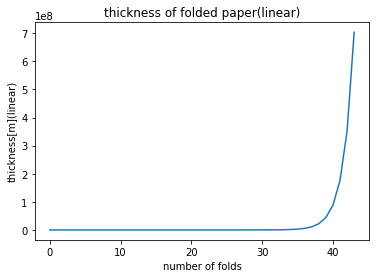

In [153]:
"""
グラフを表示する。タイトルと軸ラベル名付き。
"""
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("thickness of folded paper(linear)")
plt.xlabel("number of folds")
plt.ylabel("thickness[m](linear)")
plt.plot(thickness_list) # 「リスト名」のところにリストの変数名を入れる
plt.show()

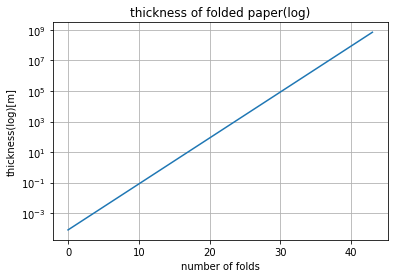

In [152]:
"""
グラフを表示する。タイトルと対数軸ラベル名付き。
"""

fig, ax = plt.subplots(facecolor="w")
ax.set_title("thickness of folded paper(log)")
ax.set_xlabel("number of folds")
ax.set_ylabel("thickness(log)[m]")
ax.set_yscale("log")
ax.grid()
ax.plot(thickness_list)

plt.show()

【考察】上記の2つのグラフから厚さは指数関数的に増加していく。

## 【問題7】グラフのカスタマイズ
グラフをより見やすくカスタマイズしてみましょう。カスタマイズしたグラフを最低3種類作成してください。例えば以下のように書き換えることで、線の色を赤に変更できます。  

どのようなことができるかはMatplotlibの公式ドキュメントを参考にします。


[matplotlib.pyplot.plot — Matplotlib 3.0.2 documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)


《カスタマイズ例》

・線の色を青と赤以外にする。  
・線を太くする。  
・線を点線にする。  
・値のフォントサイズを変更する。  

上記のページに載っていないカスタマイズも可能です。
  
  
plt.tick_params()に関しては以下のページで説明されています。

[matplotlib.pyplot.tick_params — Matplotlib 2.1.1 documentation](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.tick_params.html)


様々なカスタマイズ方法を調べて見やすいグラフを作成しましょう。


この課題への回答を分かりやすく綺麗なものにまとめられたら完成です。

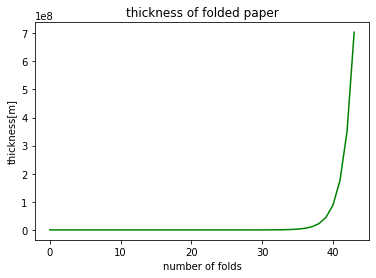

In [171]:
"""
①緑色の折れ線グラフを表示する。
"""
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(thickness_list, color='green')
plt.show()

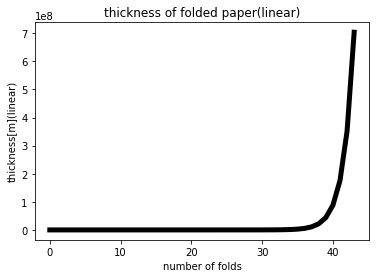

In [172]:
"""
②太線でグラフを表示する。タイトルと軸ラベル名付き。
"""
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("thickness of folded paper(linear)")
plt.xlabel("number of folds")
plt.ylabel("thickness[m](linear)")
plt.plot(thickness_list, color='black',  linestyle='solid', linewidth = 5.0) # 「リスト名」のところにリストの変数名を入れる
plt.show()


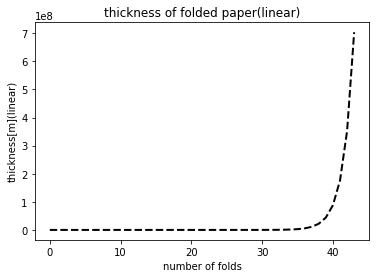

In [182]:
"""
③破線でグラフを表示する。タイトルと軸ラベル名付き。
"""
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("thickness of folded paper(linear)")
plt.xlabel("number of folds")
plt.ylabel("thickness[m](linear)")
plt.plot(thickness_list, color='black',  linestyle='dashed', linewidth = 2.0) # 「リスト名」のところにリストの変数名を入れる
plt.show()


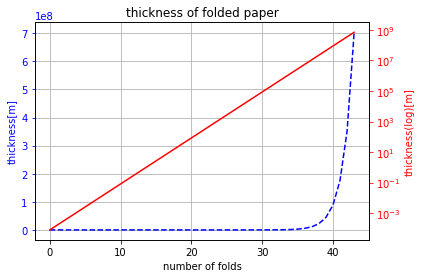

In [183]:
"""
④対数グラフと2軸で表示する。タイトルと対数軸ラベル名付き。
"""

fig, ax1 = plt.subplots(facecolor="w")
ax1.set_title("thickness of folded paper")
ax1.set_xlabel("number of folds")
ax1.set_ylabel("thickness[m]", color ='blue')
ax1.grid()
ax1.plot(thickness_list, color ='blue', linestyle='dashed')
ax1.tick_params(axis = 'y', colors ='blue')

ax2 = ax1.twinx()
ax2.set_yscale("log")
ax2.set_ylabel("thickness(log)[m]", color ='red')
ax2.plot(thickness_list,color='red')
ax2.tick_params(axis = 'y', colors ='red')

plt.show()